# **Codig Dojo**: KNN
## Creado por: Alejandro Acosta

- Fecha de creación: 2022-02-13
- Fecha de modificación: 2022-02-13
- Descripción: KNN

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder

from sklearn import preprocessing, neighbors 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split 


sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 120

In [158]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
df.columns = [i.lower() for i in ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings',]]

In [159]:
df['sex'] = df['sex'].astype('category')

In [160]:
df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')], axis=1)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [161]:
# el documento indica: +1.5 gives the age in years
df['age'] = df['rings']+1.5

## Regresión KNN

In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings', 'sex_F', 'sex_I', 'sex_M',
       'age'],
      dtype='object')

In [164]:
X = df[['sex_F','sex_I','sex_M','length', 'diameter', 'height', 'whole_weight',
        'shucked_weight', 'viscera_weight', 'shell_weight']]
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)


In [165]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [166]:
from sklearn.metrics import r2_score as r2

In [167]:
def knn_train(n=1):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    return r2(y_train, knn.predict(X_train))

def knn_test(n=1):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    return r2(y_test, knn.predict(X_test))

In [168]:
xaxis = range(1,51)

yaxis1 = [knn_train(i) for i in xaxis]
yaxis2 = [knn_test(i)  for i in xaxis]

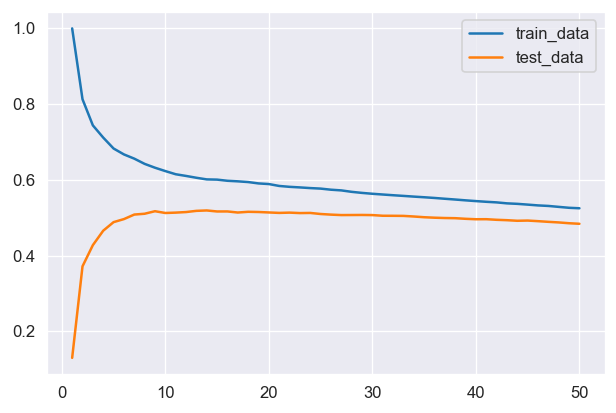

In [169]:
sns.lineplot(x=xaxis, y=yaxis1)
sns.lineplot(x=xaxis, y=yaxis2)
plt.legend(['train_data','test_data'])

In [170]:
# Número óptimo de vecinos cercanos
np.where(yaxis2==np.amax(yaxis2))[0]

array([13], dtype=int64)

In [171]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

## Clasificación KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
X = df[['length', 'diameter', 'height', 'whole_weight',
        'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']]
y = df['sex']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)


In [179]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)

In [180]:
predictions = knn.predict(X)

In [181]:
pd.crosstab(y,predictions)

col_0,F,I,M
sex,,,
F,870,117,320
I,164,1094,84
M,396,223,909


## Con y sin división de prueba y entrenamiento

In [215]:
X = df[['sex_F','sex_I','sex_M','length', 'diameter', 'height', 'whole_weight',
        'shucked_weight', 'viscera_weight', 'shell_weight']]
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [216]:
from linearmodels import OLS

In [217]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [218]:
knn.score(X,y)

0.6256502203068235

In [223]:
X['const'] = 1
X.drop('sex_F', axis=1,inplace=True)

C:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [225]:
reg = OLS(y, X).fit()
reg

C:\Users\alejo\AppData\Local\Temp/ipykernel_25468/2544798208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


OLS Estimation Summary                            
==============================================================================
Dep. Variable:                    age   R-squared:                      0.5379
Estimator:                        OLS   Adj. R-squared:                 0.5369
No. Observations:                4177   F-statistic:                    4381.1
Date:                Mon, Feb 14 2022   P-value (F-stat)                0.0000
Time:                        00:47:11   Distribution:                  chi2(9)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
sex_I             -0.8249     0.1041    -7.9212     0.0000     -1.0290     -0.6208
sex_M              0.0577     0.0913     0.6319     0.5274     -0.1213      0.2367
length            -0.4583     1.9691    -0.2328     0.8159     -4.3178      3.4011
diameter           11.075     2.5176     4.3991     0.0000      6.1407      16.009
height             10.762     5.3384     2.0159     0.0438      0.2985      21.225
whole_weight       8.9754     1.1886     7.5514     0.0000      6.6459      11.305
shucked_weight    -19.787     1.3766    -14.374     0.0000     -22.485     -17.089
viscera_weight    -10.582     1.7323    -6.1087     0.0000     -13.977     -7.1867
shell_weight       8.7418     1.7562     4.9776     0.0000      5.2996      12.184
const              5.3946     0.2914     18.512     0.0000      4.8235      5.9658
==================================================================================
OLSResults, id: 0x1fabf19e320

¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?  
KNN es mejor



In [233]:
X = df[['sex_F','sex_I','sex_M','length', 'diameter', 'height', 'whole_weight',
        'shucked_weight', 'viscera_weight', 'shell_weight']]
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)



In [234]:
knn = KNeighborsRegressor(n_neighbors=13).fit(X_train, y_train)
knn.score(X_test, y_test)

0.5182880983695688

In [235]:
X_train['const'] = 1
X_train.drop('sex_F', axis=1,inplace=True)


In [249]:
reg = OLS(y_train, X_train)
reg.fit()

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                    age   R-squared:                      0.5417
Estimator:                        OLS   Adj. R-squared:                 0.5403
No. Observations:                2923   F-statistic:                    2991.6
Date:                Mon, Feb 14 2022   P-value (F-stat)                0.0000
Time:                        00:54:48   Distribution:                  chi2(9)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
sex_I             -0.8618     0.1243    -6.9321     0.0000     -1.1054     -0.6181
sex_M              0.0231     0.1091     0.2116     0.8324     -0.1908      0.2370
length            -2.7964     2.4506    -1.1411     0.2538     -7.5996      2.0067
diameter           13.872     3.0827     4.5001     0.0000      7.8304      19.914
height             9.3679     5.4246     1.7269     0.0842     -1.2641      20.000
whole_weight       7.4752     1.3689     5.4609     0.0000      4.7923      10.158
shucked_weight    -17.793     1.5485    -11.490     0.0000     -20.828     -14.758
viscera_weight    -9.8843     1.9775    -4.9984     0.0000     -13.760     -6.0085
shell_weight       10.797     2.0700     5.2159     0.0000      6.7397      14.854
const              5.6039     0.3395     16.508     0.0000      4.9385      6.2692
==================================================================================
OLSResults, id: 0x1fabe01a0b0

¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?  
Regresión es mejor.

¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?  
El código es más largo

¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?  
Utilizando el R²

¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?  
Estandarizando los datos